# Exercises: Linear Regression

Before getting started with coding, read through this [article](https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4) and follow the instructions within the article to download the dataset.

Use this notebook to code along with the article.

## Getting Started

Import the libraries you need to start working with the dataset and make a dataframe out of the CSV in the dataset.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_data.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Run `shape()`, `info()`, and `describe()` to see what is going on with the dataset.

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Visualizing Data

Import the necessary libraries to make the same pairplots as the author. Pairplots are used by analysts to see any relationships that may exist between the x- and y-variables.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

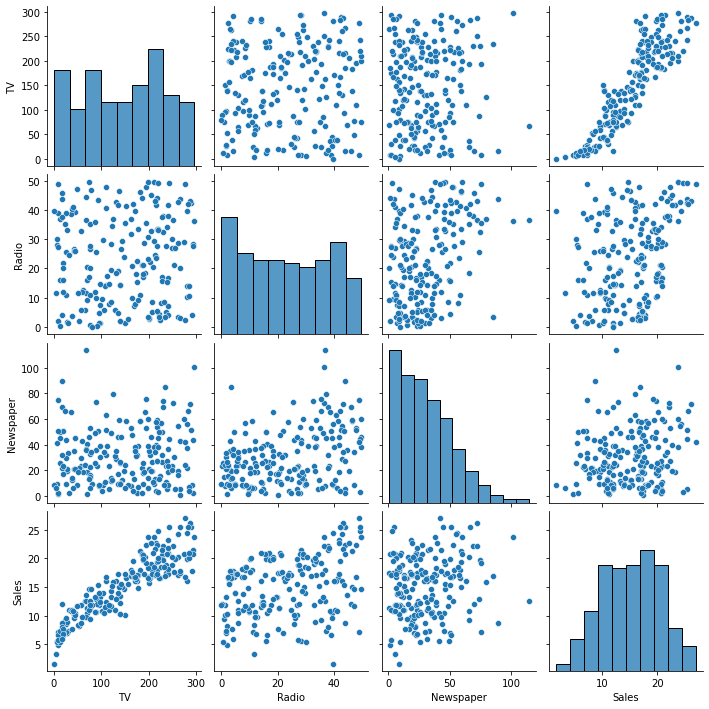

In [8]:
sns.pairplot(df)
plt.show()

Try out the heatmap next!

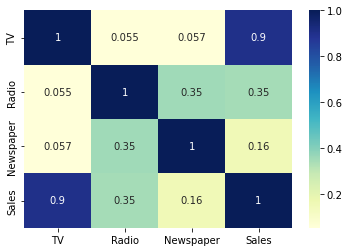

In [9]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

## Time for Linear Regression

Follow the four steps in the article to perform linear regression.

In [10]:
# Step 1 is to assign your x and y
x = df['TV']
y = df['Sales']

In [11]:
# Step 2 is to create your train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7,
                                                   test_size = 0.3,
                                                   random_state = 100)

In [12]:
x_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [13]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [14]:
# Step 3 is to build the model. Remember to import any libraries you may need
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

In [15]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
'''OLS Regression Results:
    coefficient = 0.054
    p-value = 0.000
    r-squared = 0.816
    f-stat = 1.52e-52'''

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.52e-52
Time:                        21:10:35   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

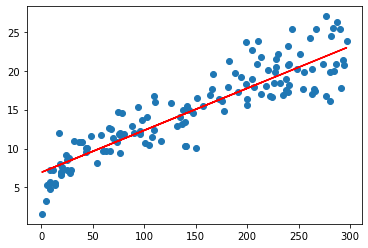

In [17]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

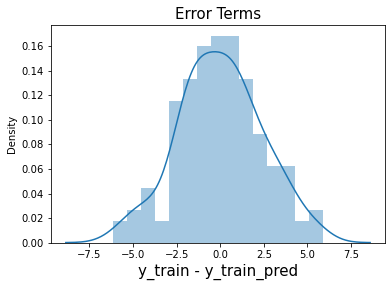

In [18]:
# Step 4 is to perform residual analysis
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

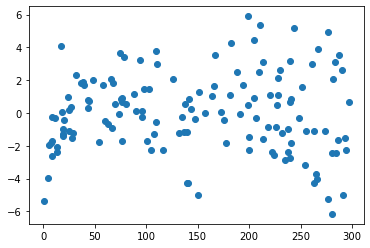

In [19]:
plt.scatter(x_train,res)
plt.show()

## Evaluate Your Model

Use your model to make some predictions on the test data.

In [20]:
# Adding a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(x_test_sm)

# Printing the first 15 predicted values
y_test_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [21]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7921031601245658

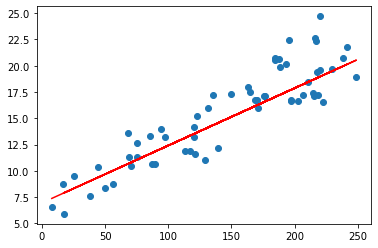

In [22]:
# Visualize the line on the test set
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [23]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [24]:
# Shape of the train set without adding column
x_train_lm.shape

# Adding additional column to the train and test data
x_train_lm =x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

print(x_train_lm.shape)
print(x_test_lm.shape)

(140, 1)
(60, 1)


In [25]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [26]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 6.94868320000136
Slope : [0.05454575]


In [27]:
# Making Predictions of y_value
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480388
0.792103160124566


## Summarize Your Results

Make note of your answers to each of the following questions by editing the cell.

1. Did you get the same coefficients and p-values as the author? Yes
2. Did you get the same R-squared values as the author? Yes
3. Did you get the same F-statistic value and significance as the author? Yes